# Resumo, Teoria e Prática - matplotlib
> Autor: Gil Miranda<br>
> Repo: http://www.gilmiranda.me<br>
> GitHub: @mirandagil
> Fontes bibliográficas:
   * https://realpython.com/python-matplotlib-guide/<br>
   * https://matplotlib.org/
   * https://matplotlib.org/api/markers_api.html#module-matplotlib.markers
   
`last update: 10/10/2018`

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Hierarquia dos objetos da matplotlib


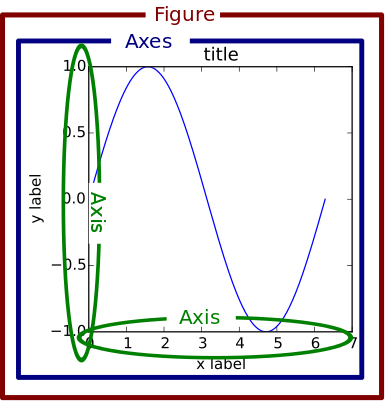

> Importante notar que `AXES` é o objeto referente a um gráfico inteiro, enquanto as linhas de coordenadas são `AXIS`

### Hierarquia na prática
> https://matplotlib.org/examples/showcase/anatomy.html

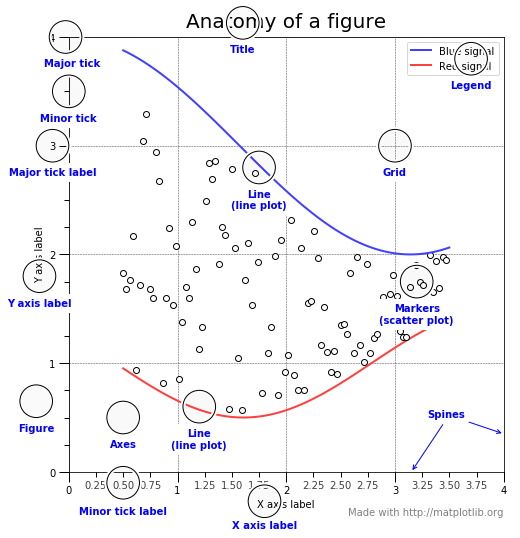

In [4]:
# This figure shows the name of several matplotlib elements composing a figure

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter


np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xycoords='data',
            xytext=(3.3, 0.5), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xycoords='data',
            xytext=(3.45, 0.45), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()

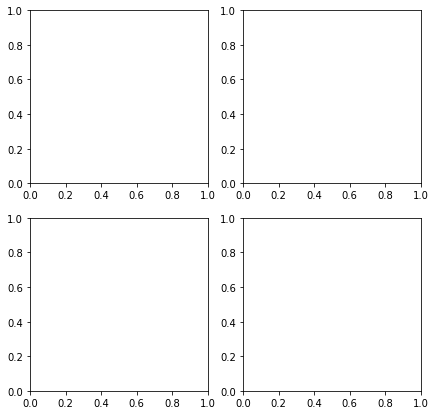

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7,7))

### Plotando um gráfico, ou `AXES`, com subplot

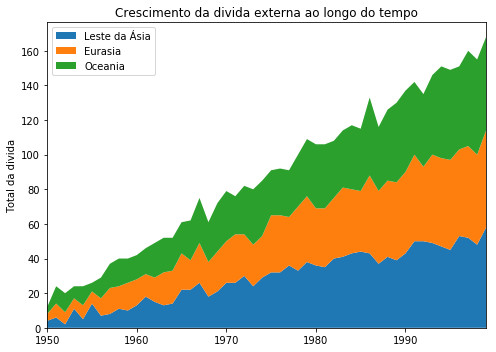

In [6]:
rng = np.arange(50)
rnd = np.random.randint(0,10,size=(3,rng.size))
yrs = 1950 + rng

fig, ax = plt.subplots(figsize=(7,5))
ax.stackplot(yrs,rng + rnd, labels=['Leste da Ásia', 'Eurasia', 'Oceania'])
ax.set_title('Crescimento da divida externa ao longo do tempo') ## Titulo do gráfico, ou AXES sendo manipulado no momento
ax.legend(loc='upper left') ## Define o local da legenda
ax.set_ylabel('Total da divida')
ax.set_xlim(left=yrs[0],right=yrs[-1])
fig.tight_layout()

### Plotando mais de um gráfico com subplot

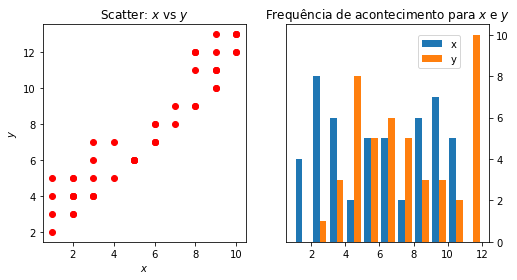

In [7]:
x = np.random.randint(1,11,50)
y = x + np.random.randint(1,5,x.size)
data = np.column_stack((x,y))
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(8,4))

ax1.scatter(x=x,y=y, marker='o', c='r')
ax1.set_title('Scatter: $x$ vs $y$ ')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')

ax2.hist(data, bins=np.arange(data.min(), data.max()), label=('x','y'))
ax2.legend(loc=(0.65,0.8))
ax2.set_title('Frequência de acontecimento para $x$ e $y$')
ax2.yaxis.tick_right()

---
### Criando mais de um gráfico numa mesma figura

#### Uma primeira maneira


 Lista dos AXES 
 [[<matplotlib.axes._subplots.AxesSubplot object at 0x7f56f4a77240>

 
 Dimensão da matriz ax 
 (2, 2)

 
 Lista de AXES de uma linha 

 
 Acessando um único AXES 
 AxesSubplot(0.125,0.536818;0.352273x0.343182)


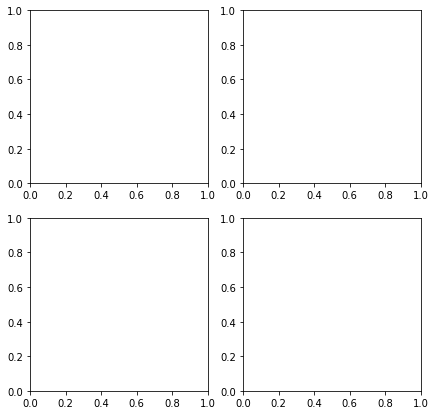

In [60]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7,7)) ## Quando criado desta forma, ax será uma lista contendo todos os subplots

print('\n Lista dos AXES \n', ax)

print('\n \n Dimensão da matriz ax \n', ax.shape)

## Os cada AXES pode ser acessado da mesma forma que se acessa listas

print('\n \n Lista de AXES de uma linha \n',ax[0]) ## Lista de plots da primeira linha

print('\n \n Acessando um único AXES \n', ax[0][0]) ## Objeto único plot da primeira linha primeira coluna

#### Uma segunda maneira


 Gráfico linha 1 coluna 1 
 AxesSubplot(0.125,0.536818;0.352273x0.343182)

 Gráfico linha 1 coluna 2 
 AxesSubplot(0.547727,0.536818;0.352273x0.343182)

 Gráfico linha 2 coluna 1 
 AxesSubplot(0.125,0.125;0.352273x0.343182)

 Gráfico linha 2 coluna 2 
 AxesSubplot(0.547727,0.125;0.352273x0.343182)


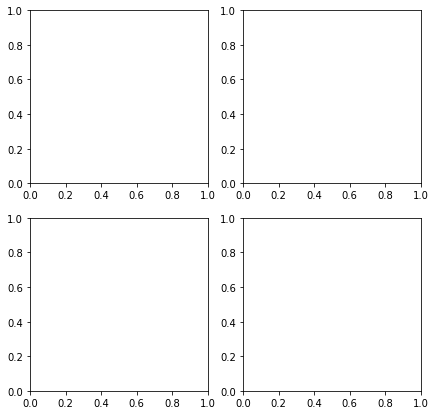

In [68]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7,7))
ax1, ax2, ax3, ax4 = ax.flatten() ## Decompactar o array ax em outros 4 objetos singulares

print('\n Gráfico linha 1 coluna 1 \n', ax1)
print('\n Gráfico linha 1 coluna 2 \n', ax2)
print('\n Gráfico linha 2 coluna 1 \n', ax3)
print('\n Gráfico linha 2 coluna 2 \n', ax4)

#### Terceira via


 Gráfico linha 1 coluna 1 
 AxesSubplot(0.125,0.536818;0.352273x0.343182)

 Gráfico linha 1 coluna 2 
 AxesSubplot(0.547727,0.536818;0.352273x0.343182)

 Gráfico linha 2 coluna 1 
 AxesSubplot(0.125,0.125;0.352273x0.343182)

 Gráfico linha 2 coluna 2 
 AxesSubplot(0.547727,0.125;0.352273x0.343182)


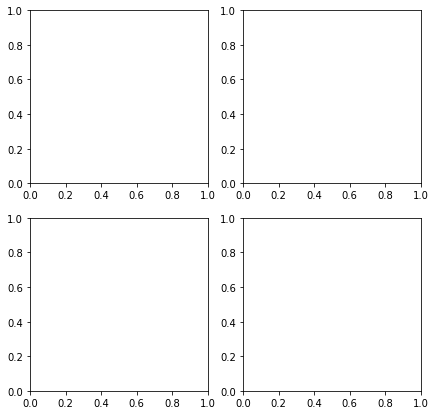

In [72]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(7,7)) ## Cria os axes já descompactando em objetos singulares

print('\n Gráfico linha 1 coluna 1 \n', ax1)
print('\n Gráfico linha 1 coluna 2 \n', ax2)
print('\n Gráfico linha 2 coluna 1 \n', ax3)
print('\n Gráfico linha 2 coluna 2 \n', ax4)

In [3]:
# Recebimento e tratamento de dados
from io import BytesIO
import tarfile
from urllib.request import urlopen

url = 'http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz'
b = BytesIO(urlopen(url).read())
fpath = 'CaliforniaHousing/cal_housing.data'

with tarfile.open(mode='r', fileobj=b) as archive: housing = np.loadtxt(archive.extractfile(fpath), delimiter=',')

y = housing[:,-1]
pop, age = housing[:,[4,7]].T

In [4]:
# Metódos facilitadores
def add_titlebox(ax, text):
    ax.text(.55,.8,text,horizontalalignment='center',transform=ax.transAxes,bbox=dict(facecolor='white',alpha=0.6),fontsize=12.5)
    return ax

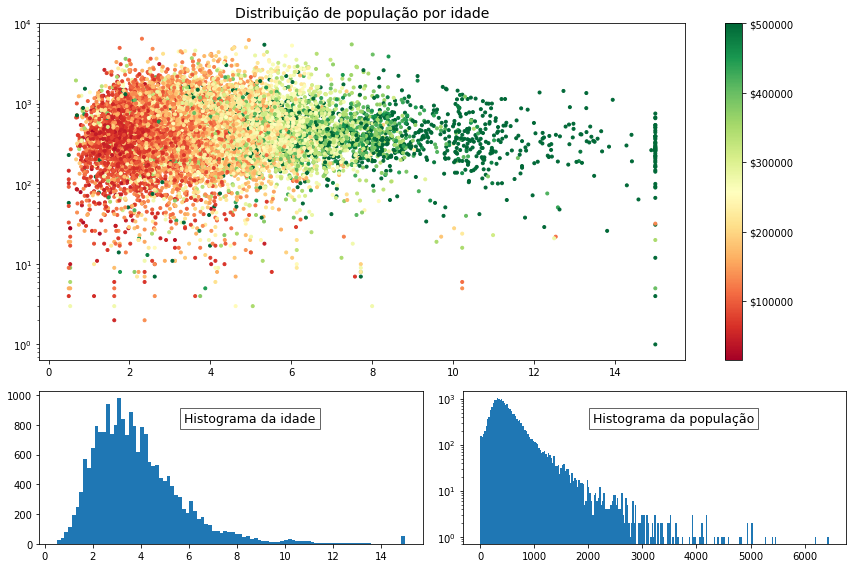

In [12]:
# Plotando
gridsize = (3,2)
fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot2grid(gridsize, (0,0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2,0))
ax3 = plt.subplot2grid(gridsize, (2,1))
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot2grid.html
# matplotlib.pyplot.subplot2grid(shape, loc, rowspan=1, colspan=1, fig=None, **kwargs)

ax1.set_title('Distribuição de população por idade', fontsize=14)
sctr = ax1.scatter(x=age, y=pop, c=y, cmap='RdYlGn', marker='.')
plt.colorbar(sctr,ax=ax1,format='$%d')
ax1.set_yscale('log')

#matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, ...
# ... vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, data=None, **kwargs)

ax2.hist(age, bins='auto')
ax3.hist(pop, bins='auto', log=True)
a=2
add_titlebox(ax2,'Histograma da idade')
add_titlebox(ax3, 'Histograma da população')
fig.tight_layout()
